<a href="https://colab.research.google.com/github/witkov/chi-squared/blob/master/generic-2d-chi2-contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best-fit slope:  1.0690476190476172
Best-fit intercept:  1.109523809523802
Chi-squared min:  0.6428571429023577


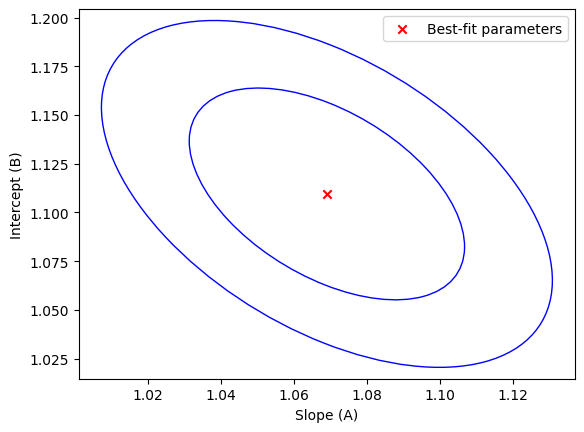

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def mean(arr):
    return np.mean(arr)

def plot_chi_squared_ellipses(A_best, B_best, var_A, var_B, cov_AB):
    fig, ax = plt.subplots()
    ax.scatter(A_best, B_best, color='red', marker='x', label='Best-fit parameters')

    # Define the chi-squared contours at delta_chi2 = 2.3 and delta_chi2 = 6.17
    delta_chi2 = [2.3, 6.17]

    for chi2 in delta_chi2:
        # Calculate the semi-major and semi-minor axes and rotation angle for the ellipse
        a = np.sqrt(2.0 * chi2 * var_A)
        b = np.sqrt(2.0 * chi2 * var_B)
        theta = 0.5 * np.arctan(2.0 * cov_AB / (var_A - var_B))
        theta = np.degrees(theta)

        # Create the ellipse
        ellipse = Ellipse(xy=(A_best, B_best), width=a * 2, height=b * 2, angle=theta, edgecolor='blue', fill=False)
        ax.add_patch(ellipse)

    ax.set_xlabel('Slope (A)')
    ax.set_ylabel('Intercept (B)')
    ax.legend(loc='best')
    plt.show()

# Data set: independent variable (x)
x1 = 1
x2 = 2
x3 = 3
x = np.array([x1, x2, x3])

# Data set: dependent variable (y)
# Enter repeated measurements of y for each distinct x value.
y1 = np.array([2.1, 2.3, 2.2])
y2 = np.array([3.3, 3.2, 3.2])
y3 = np.array([4.4, 4.2, 4.5])

# Calculate the mean and standard error of the dependent variable
y_mean = np.array([mean(y1), mean(y2), mean(y3)])
sigma_y = np.array([np.std(y1, ddof=1), np.std(y2, ddof=1), np.std(y3, ddof=1)] / np.sqrt(np.size(y1)))

# y and yerr data arrays
y = y_mean
yerr = sigma_y

# calculate sums needed to calculate chi-squared in closed-form
s_yy = sum(y ** 2 / yerr ** 2)
s_xx = sum(x ** 2 / yerr ** 2)
s_0 = sum(1 / yerr ** 2)
s_xy = sum((y * x) / yerr ** 2)
s_y = sum(y / yerr ** 2)
s_x = sum(x / yerr ** 2)

# Calculate the best-fit slope and intercept
A_best = (s_0 * s_xy - s_x * s_y) / (s_0 * s_xx - s_x ** 2)
B_best = (s_y * s_xx - s_x * s_xy) / (s_0 * s_xx - s_x ** 2)

# Calculate the variance and covariance
var_A = 1 / s_xx
var_B = 1 / s_0
cov_AB = -s_x / (s_xx * s_0)

# Calculate the chi-squared min value
min_chi2 = s_yy + (s_0 * s_xy ** 2 - 2 * s_x * s_y * s_xy + s_y ** 2 * s_xx) / (s_x ** 2 - s_0 * s_xx)

# Display output
print("Best-fit slope: ", A_best)
print("Best-fit intercept: ", B_best)
print("Chi-squared min: ", min_chi2)

# Plot the chi-squared ellipses
plot_chi_squared_ellipses(A_best, B_best, var_A, var_B, cov_AB)
